# Métodos no supervisados

## Clustering

Las técnicas de clustering consisten en un conjunto de metodologías que buscan obtener subgrupos en los datos. Dentro de cada subgrupo las observaciones deben ser similares y heterogeneas en comparación con elementos de otros grupos.

Cuando se hace un análisis clustering se parte de la premisa de que los datos no se han distribuido de forma completamente aleatoria y por lo tanto existen patrones en ellos que nos pueden dar información. Son técnicas de aprendizaje no supervisado por el hecho de que no existe una variable *output* que tratamos de predecir.

La partición en grupos tiene que cumplir las siguientes condiciones. Sean $C_1,...,C_k$ los cluster formados, estos deben cumplir:


1.   $C_1\cup C_2 \cup ...\cup C_k = \{1,...,n\} $ o sea cada observación pertenece a al menos uno de los $K$ subgrupos. 
2.   $C_i \cap C_j = \emptyset$ para todo $i \neq j$. En otras palabras los agrupamientos no se superponen.



## Preparación de datos

En esta sección vamos a trabajar con una base de datos que muestra las características de los vinos y de acuerdo a ella cual es la calidad que presentan


In [20]:
library(tidyverse)

In [21]:
vinos <- read_csv("WineQT.csv")
head(vinos)

Rows: 1143 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,2
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,3
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,4
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,5


In [22]:
unique(vinos$quality)

[1] 5 6 7 4 8 3

In [49]:
vinos %>%   group_by(quality) %>%
  summarise(alcohol.media = mean(alcohol),sulfato.media = mean(sulphates), cant = n())   

quality,alcohol.media,sulfato.media,cant
<dbl>,<dbl>,<dbl>,<int>
3,9.691667,0.5500000,6
4,10.260606,0.6378788,33
5,9.902277,0.6133747,483
6,10.655339,0.6765368,462
7,11.482634,0.7435664,143
8,11.937500,0.7662500,16


In [50]:
# tomamos las variables que vamos a usar para agrupar
variables <- names(vinos)[1:(length(names(vinos))-2)]
variables

[1] "fixed acidity"        "volatile acidity"     "citric acid"         
 [4] "residual sugar"       "chlorides"            "free sulfur dioxide" 
 [7] "total sulfur dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"

In [51]:
set.seed(54)
vinos.scaled <- scale(vinos)
X <- vinos.scaled[,variables]
X <- as.data.frame(X)


## K-Means

La idea detrás de K-means clustering es que existe un buen agrupamiento si la disimilitud dentro de cada cluster es la menor posible. Entonces podemos plantear el problema cómo la minimización de un función dada de la siguiente forma:

\begin{equation}
min_{C_1,...,C_K} \left(\sum_{k=1}^{K} W\left(C_k\right)\right)
\end{equation}

en dónde $W$ es la función de disimilitud de intra-cluster. En palabras, se busca una partición de los datos en $K$ grupos en dónde la suma total de las disimilitudes sea la menor posible.

La función de disimilitud puede definirse de muchas maneras, pero la más habitual es la distancia Euclídea. 

\begin{equation}
W\left(C_k\right) = \frac{1}{\left|C_k\right|} \sum_{i,i'∈C_k}\sum_{j=1}^p \left(x_{ij}-x_{i'j}\right)^2,
\end{equation}

dónde $\left|C_k\right|$ refleja el número de observaciones dentro del cluster k. 

Encontrar una solución a ese problema es realmente un problema muy difícil ya que existen $K^n$ formas de dividr las observaciones dentro de $K$ grupos. Esto es un número muy grande aún cuando haya pocos datos. Para resolverlo, entonces, existen algoritmos que llegan a soluciones locales.



1.   Asignar aleatoriamente de 1 a $K$ clusters a cada dato.
2.   Iterar hasta que la asignación de clusters deje de cambiar:
    - Por cada cluster calcular el centroide
    - Asignara a cada observación el cluster del centroide más cercano




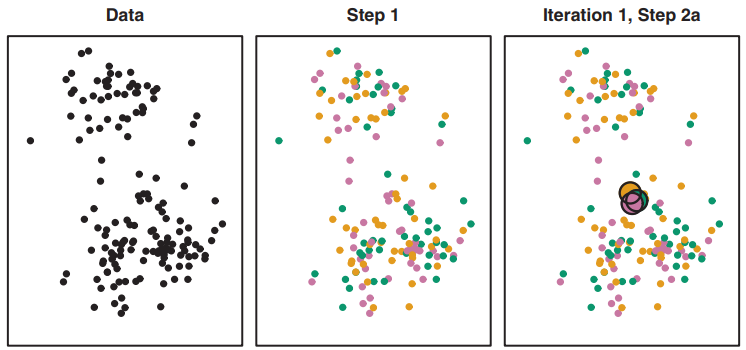

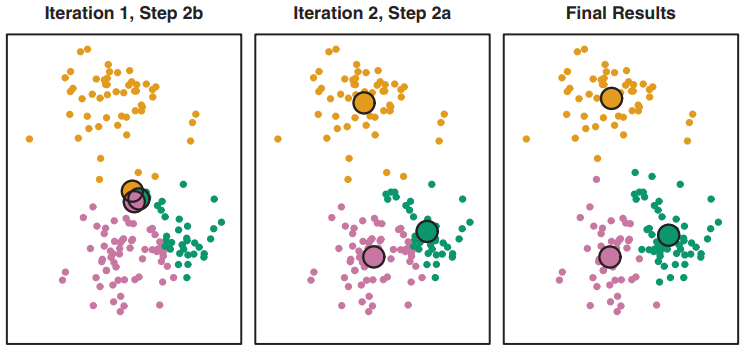

### K-means con R

Para trabajar el algoritmo de k-means en R hay que usar la clase kmeans que viene por defecto con R.

Trabajemos primero con dos variables para poder ver los resultados graficamente

In [71]:
set.seed(9) #elegimoso una semilla porque tiene componente aleatorio
v2 <- c('alcohol','sulphates') #elegimos dos variables a evaluar
X2v <- X[,v2] 
km2v <- kmeans(X2v,6) # creamos el objeto kmeans  de 6 grupos distintos commo son las categorías

In [72]:
str(km2v)

List of 9
 $ cluster     : int [1:1143] 1 2 1 1 1 1 1 1 1 1 ...
 $ centers     : num [1:6, 1:2] -0.782 -0.602 0.456 0.821 1.972 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:6] "1" "2" "3" "4" ...
  .. ..$ : chr [1:2] "alcohol" "sulphates"
 $ totss       : num 2284
 $ withinss    : num [1:6] 97.5 61.1 76.3 74.9 82.5 ...
 $ tot.withinss: num 481
 $ betweenss   : num 1803
 $ size        : int [1:6] 443 154 245 147 119 35
 $ iter        : int 4
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


Podemos consultar los clusters que se han generado simplemente llamando al atributo *cluster* y los centroides con el atributo *centers*

In [73]:
print(head(km2v$cluster,10))
print(head( km2v$centers))

 [1] 1 2 1 1 1 1 1 1 1 1
     alcohol   sulphates
1 -0.7824964 -0.58373978
2 -0.6024418  0.65671037
3  0.4563639 -0.40357705
4  0.8210169  0.94084879
5  1.9716019 -0.06693281
6 -0.7913515  3.59999823


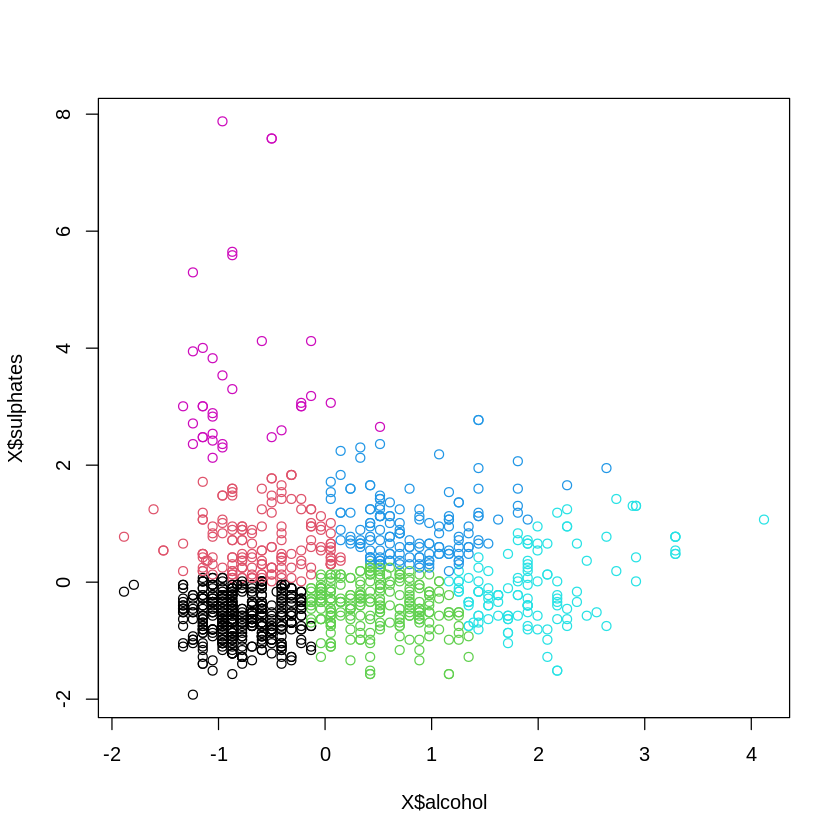

In [74]:
plot(X$alcohol, X$sulphates, col = km2v$cluster)

Podemos ver los resultados que arroja la función de disimilitud con los atributos *tot.whithinss* y tambíen la sumatoría entre cluisters con el atributo *betweenss*. 
Pero un indicador que se usa más habitual para medir el rendimiento es el ratio que se produce entre betweenss/totss.


In [75]:
print(paste('La suma total de diferencias al cuadrado es: ', km2v$totss))
print(paste('La suma total de diferencias al cuadrado intra-cluster es: ', km2v$tot.withinss))
print(paste('La suma total de diferencias al cuadrado entre-cluster es: ', km2v$betweenss))
print(paste('El ratio entre between ss y totss es: ', km2v$betweenss/km2v$totss))

[1] "La suma total de diferencias al cuadrado es:  2284"
[1] "La suma total de diferencias al cuadrado intra-cluster es:  480.718790819538"
[1] "La suma total de diferencias al cuadrado entre-cluster es:  1803.28120918046"
[1] "El ratio entre between ss y totss es:  0.789527674772532"


Tambien podemos ver cual es la suma intra cluster de cada uno de los grupos formados

In [76]:
km2v$withinss

[1] 97.46778 61.05012 76.30278 74.87826 82.47967 88.54018

In [77]:
vinos %>%   group_by(km2v$cluster) %>%
  summarise(alcohol.media = mean(alcohol),sulfato.media = mean(sulphates), cant = n())  

km2v$cluster,alcohol.media,sulfato.media,cant
<int>,<dbl>,<dbl>,<int>
1,9.595297,0.5582393,443
2,9.790152,0.7696104,154
3,10.935986,0.5889388,245
4,11.330612,0.8180272,147
5,12.575770,0.6463025,119
6,9.585714,1.2711429,35


## Agrupamientos jerárquicos

Una de las desventejas de K-means es que hay que elegir el número de grupos antes de iniciar el algoritmo. Los agrupamientos jerárquicos permiten iniciar el método sin la necesidad de comprometerse con el número de grupos que buscamos. Además tiene otra ventaja, ofrecen una representacíon de tipo árbol  de decisión que se denomina dendograma

**¿Qué son los dendogramas?**

El dendograma se va formando con la unión de las observaciones que son parecidas entre sí. Se inicia de las más parecidas que hay, sería las ramas más bajas, luego se van asociando los diferentes grupos a medida que sean más parecidos. Así hasta unir a todas las observaciones en un solo árbol.

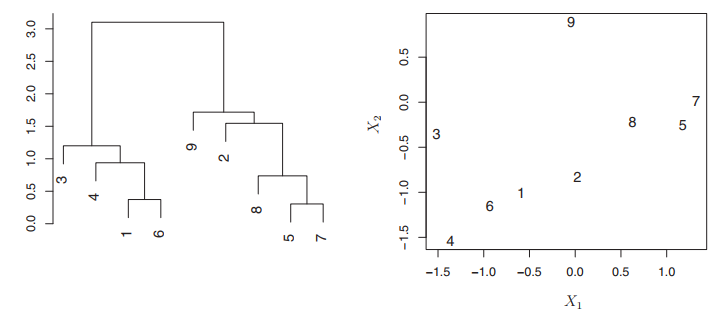

**El algoritmo del clustering jerárquico**

El algoritmo utilizado es muy simple. Primero hay que definir cual es la función de de disimilitud que se va utilizar. Luego se empieza fusionando las dos observaciones más similares, entonces quedan n-1 clústers. Luego se unen el otro par de grupos más similares, ahora quedan n-2. Así se continúa hasta que quedan todos en un solo grupo. 

Sin embargo aún queda definir una función de disimilitud que funcione entre grupos. Esto se denomina enlace (*linkage*) y existen 3 formas distintas de enlace.

- Enlace completo: se toma como dismilitud entre grupos la máxima dismilitud
\begin{equation}
d_{CL}(A,B)= max_{i∈A, j∈B}\left(d(i,j)\right)
\end{equation}
- Enlace simple: Se considera la mínima disimilitud
\begin{equation}
d_{CL}(A,B)= min_{i∈A, j∈B}\left(d(i,j)\right)
\end{equation}
- Enlace promedio: se computa el promedio de todas las disimilutdes
\begin{equation}
d_{AL}(A,B)= \frac{1}{\left|A\right|\left|B\right|}\sum_{i∈A}\sum_{j∈B}d(i,J)
\end{equation}

Existe otra forma de enlace que es la denominada Ward. Esta va evaluando la distancia de cada observación al centroide del grupo y va evaluando como se va empeorando esta distancia a medida que se agregan grupos.

### Clustering jerárquico en R

Para aplicar está metodología con R hay que usar la clase hclust, los argumentos básicos que recibe son una matriz de distancia de los datos y el método que se va utilizar. Por lo tanto a la matriz de datos hay que aplicar la función "dist" de R que calcula la distancia euclidiana entre las observaciones.


In [78]:
hc.comp <- hclust(dist(X2v), method = "complete")
hc.simple <- hclust(dist(X2v), method = "single")
hc.ave <- hclust(dist(X2v), method = "average")

Como se ve no hace falta determinar cuantos son los grupos que vamos a estar buscando, el objeto ya devuelve el dendograma que produjo el agrupamiento. 

Aplicando la función plot() podemos visualizar los dendogramas que se han formado.

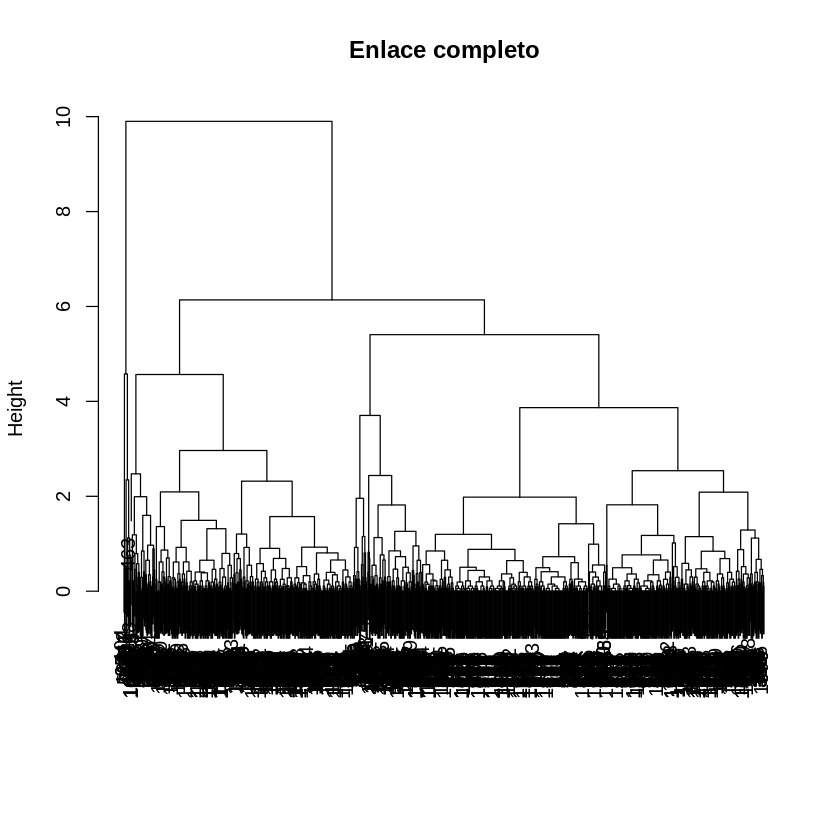

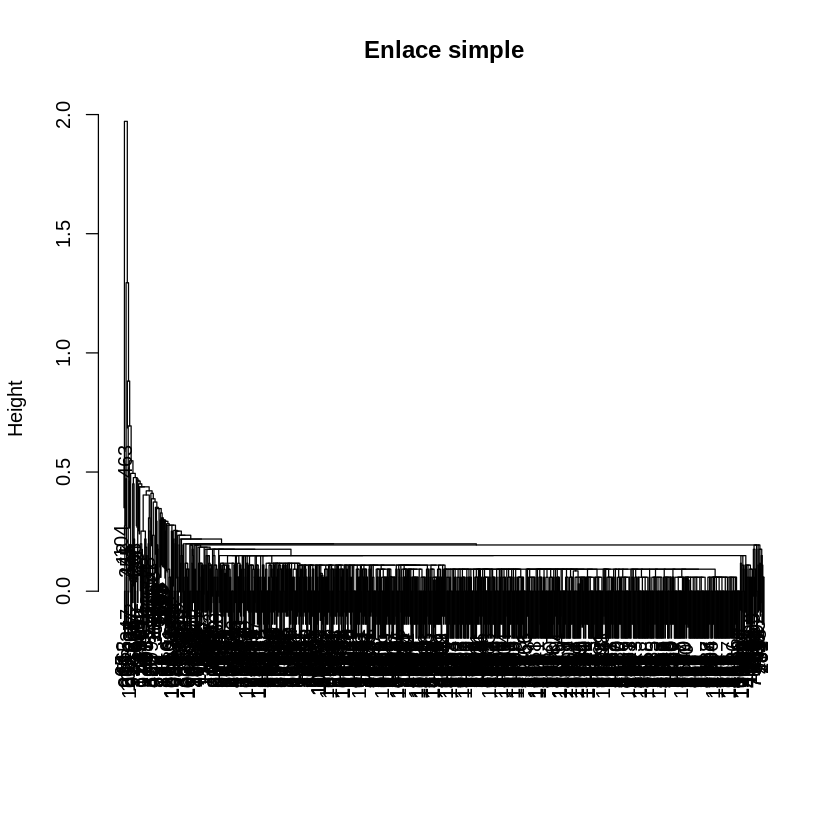

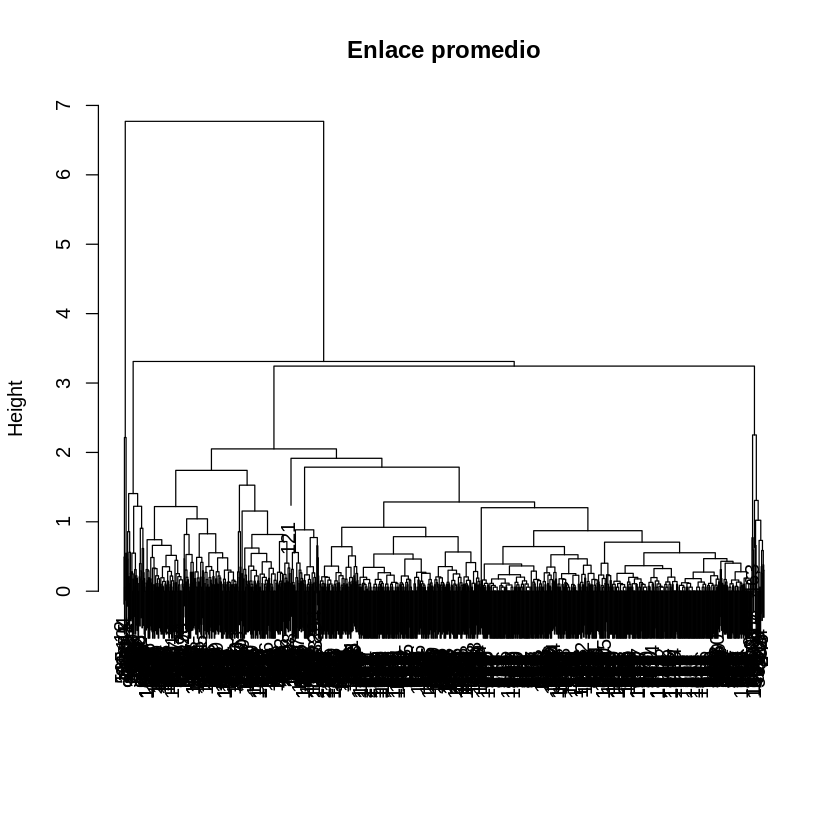

In [79]:
plot(hc.comp, main = "Enlace completo", xlab = "", sub = "")
plot(hc.simple, main = "Enlace simple", xlab = "",sub = "")
plot(hc.ave, main = "Enlace promedio",xlab = "",sub = "")

Para calcular el jerárquico con enlace ward hay que ponerlo en el método también con la palabra "ward.D"

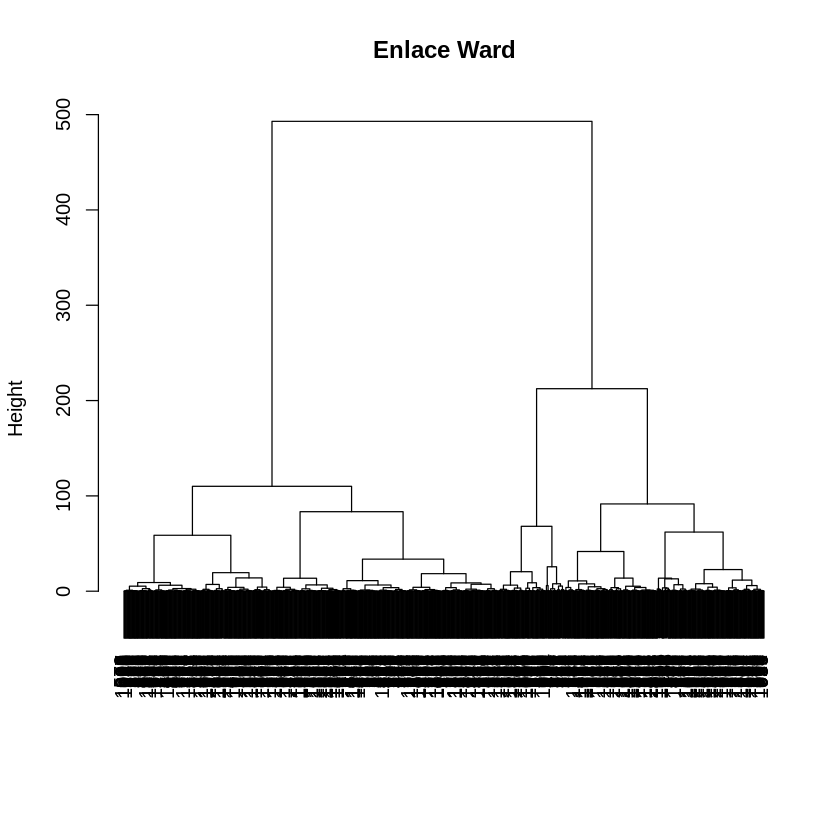

In [80]:
hc.ward <- hclust(dist(X2v), method = "ward.D")
plot(hc.ward, main = "Enlace Ward",xlab = "",sub = "")

Para cortar el árbol exta la función cutree() que solicita dos argumentos, por un lado un dendograma y  la cantidad de grupos que deseamos.

In [62]:
cutree(hc.comp,6)

[1] 1 2 2 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 3 1 2 2 4 2 2 2 2
  [38] 2 2 2 2 2 1 2 2 5 5 2 2 2 1 3 5 2 2 2 2 2 2 2 2 1 1 2 2 2 5 5 2 2 2 2 2 2
  [75] 2 2 2 2 2 1 2 2 2 2 5 1 2 5 5 2 2 4 2 2 2 2 4 2 4 2 2 2 2 1 2 2 2 2 2 2 2
 [112] 2 2 2 1 1 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 3 5 2 2 3 3 2
 [149] 5 2 2 2 2 5 2 2 2 2 2 3 2 2 4 2 1 2 2 2 3 2 1 1 1 2 1 3 2 3 2 2 1 2 2 1 2
 [186] 2 2 2 3 1 5 1 1 5 5 1 1 5 3 1 2 3 1 1 1 2 3 1 3 1 2 1 1 1 1 1 5 2 1 2 2 1
 [223] 1 2 1 1 5 3 3 1 1 1 3 3 1 5 5 3 4 2 1 1 1 3 3 2 1 2 3 4 4 3 3 1 1 2 1 1 3
 [260] 1 1 1 5 2 2 3 5 3 2 1 1 4 1 1 3 1 3 2 1 1 1 2 3 3 1 1 2 3 1 1 3 2 1 2 4 5
 [297] 2 4 5 3 1 1 2 2 1 1 1 2 3 2 1 1 4 1 5 2 3 3 2 3 5 3 3 1 1 3 1 1 3 4 1 2 1
 [334] 5 1 3 1 2 3 1 5 1 2 3 3 4 4 3 4 2 1 5 2 3 1 3 3 2 5 2 1 3 1 1 3 3 1 3 1 3
 [371] 1 1 5 2 3 1 1 4 1 3 2 2 3 3 1 3 2 3 1 1 1 3 1 2 3 3 5 1 3 1 3 3 1 2 3 3 1
 [408] 3 5 3 3 2 1 1 2 1 1 2 2 4 1 4 1 1 1 1 2 1 1 3 1 4 1 1 2 1 1 1 1 1 2 1 1 1
 [445] 1 2 1 1 2 3 2 2 1 1 2 1 1 1 5 5 5 1 6 3 1 1 1 3 2 2 1 2 1 1 1 1 2 2 1 2 3
 [482] 2 2 1 5 1 5 2 1 1 1 1 1 4 2 1 3 3 2 2 2 1 1 2 2 5 3 1 1 2 1 1 1 1 2 3 3 2
 [519] 2 4 1 3 2 1 1 2 1 1 5 1 1 1 1 1 1 1 1 1 2 5 5 2 2 1 1 2 2 1 1 2 2 2 2 1 1
 [556] 2 2 2 3 2 2 2 2 1 1 1 1 2 1 2 5 4 3 2 5 3 2 4 2 2 4 2 2 2 3 5 3 1 2 4 2 2
 [593] 5 2 5 5 1 4 4 5 2 2 2 2 2 2 2 2 5 5 5 5 2 2 2 2 2 2 2 5 5 5 5 2 3 3 5 1 2
 [630] 1 2 2 5 4 5 4 5 2 2 5 5 5 5 4 3 5 5 5 3 5 5 3 5 5 5 3 2 5 5 2 2 2 5 5 4 3
 [667] 4 3 4 5 5 4 5 5 2 5 5 5 2 2 5 2 4 2 5 2 1 5 3 2 4 3 5 2 2 5 2 2 2 2 2 4 5
 [704] 2 4 5 5 5 4 2 2 2 5 4 4 2 5 5 2 4 2 3 4 5 2 1 2 2 4 4 5 2 4 5 2 2 2 2 2 4
 [741] 4 2 5 1 3 5 1 4 5 5 5 2 4 5 2 5 1 2 5 3 4 4 2 5 2 3 5 2 2 5 5 5 5 5 5 2 4
 [778] 5 5 4 4 5 1 3 2 4 5 4 5 5 5 4 4 4 4 5 5 3 3 4 5 5 5 3 1 1 2 5 5 2 2 2 2 3
 [815] 5 5 4 2 5 2 5 4 5 2 4 5 5 2 5 2 2 5 5 5 5 5 2 5 5 2 5 5 4 2 2 2 5 2 2 5 5
 [852] 1 5 5 2 5 5 2 2 2 2 5 3 3 3 1 2 1 4 2 5 5 2 4 2 4 1 5 2 1 2 2 5 2 2 2 5 2
 [889] 5 5 2 5 2 5 2 2 5 2 4 5 5 2 5 2 5 2 2 5 2 2 5 2 5 2 1 1 5 5 4 2 4 4 5 4 5
 [926] 5 2 2 3 2 4 2 2 4 2 4 5 2 2 2 2 2 2 2 2 2 1 2 4 2 2 2 2 2 2 2 3 2 5 2 5 2
 [963] 2 2 5 2 2 2 2 5 2 2 2 2 5 2 2 2 5 5 2 2 2 2 2 2 4 5 2 2 2 2 2 5 2 5 2 3 2
[1000] 2 4 2 5 2 2 2 1 2 1 4 2 2 2 2 5 5 5 5 5 2 2 2 1 1 5 2 5 5 2 2 5 5 2 5 3 5
[1037] 2 2 5 2 2 5 2 2 5 2 2 2 4 5 5 1 4 1 4 3 3 2 3 5 2 2 2 5 4 5 2 2 2 5 5 2 5
[1074] 5 2 5 5 3 5 2 2 1 1 2 2 2 2 2 2 2 2 2 5 2 2 2 5 2 5 5 5 2 2 3 5 1 5 1 2 2
[1111] 5 1 2 2 2 2 2 5 5 2 2 5 4 5 2 4 5 5 5 5 5 5 2 5 5 5 5 5 5 2 2 5 2

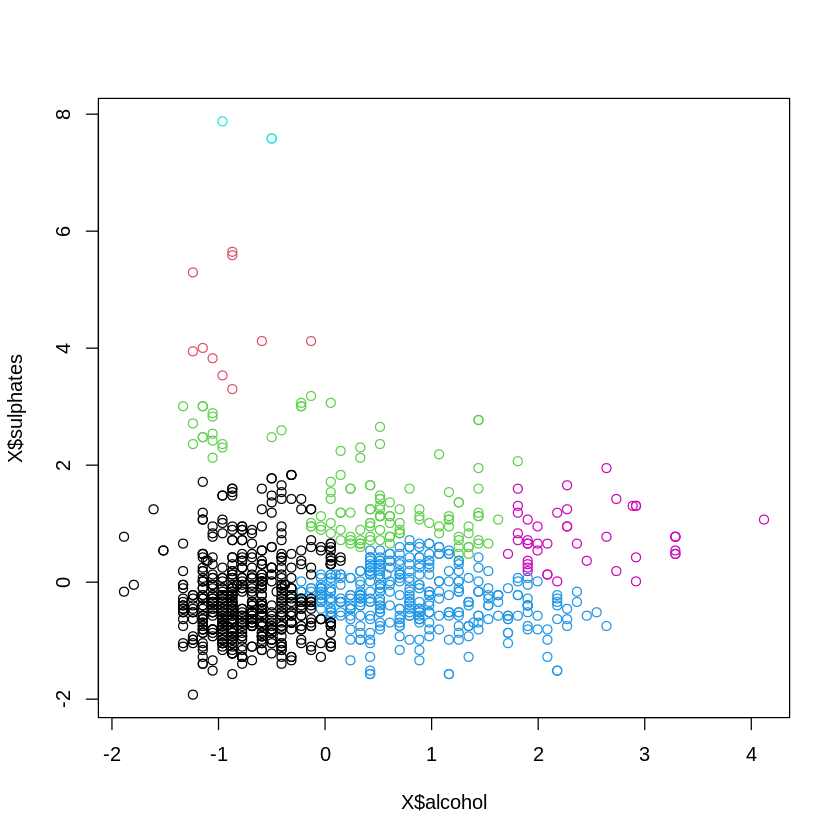

In [81]:
plot(X$alcohol, X$sulphates, col = cutree(hc.comp,6))

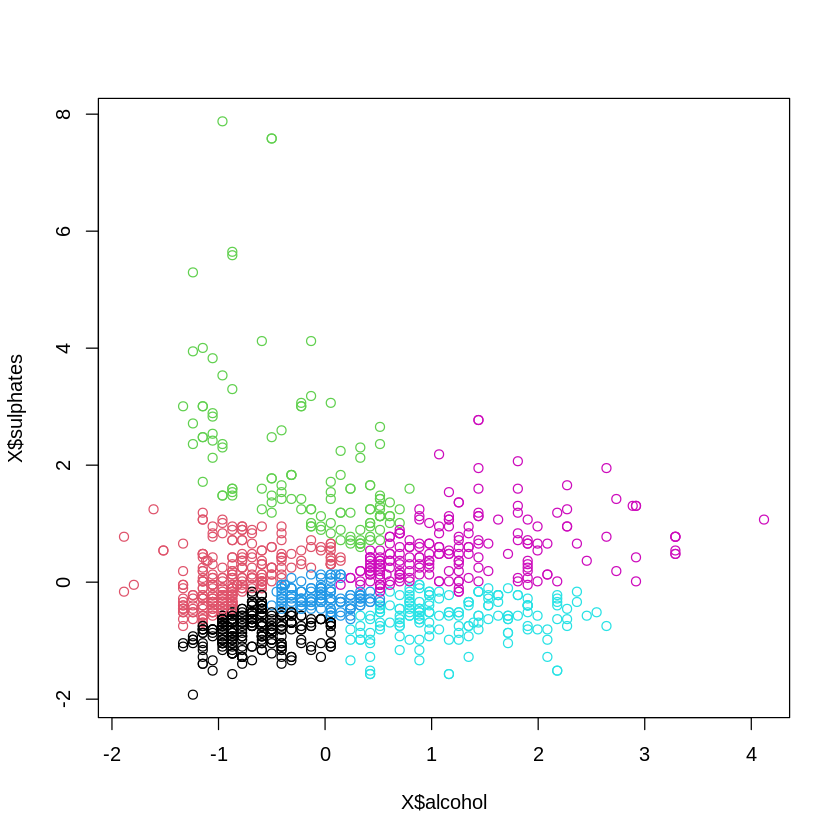

In [82]:
plot(X$alcohol, X$sulphates, col = cutree(hc.ward,6))

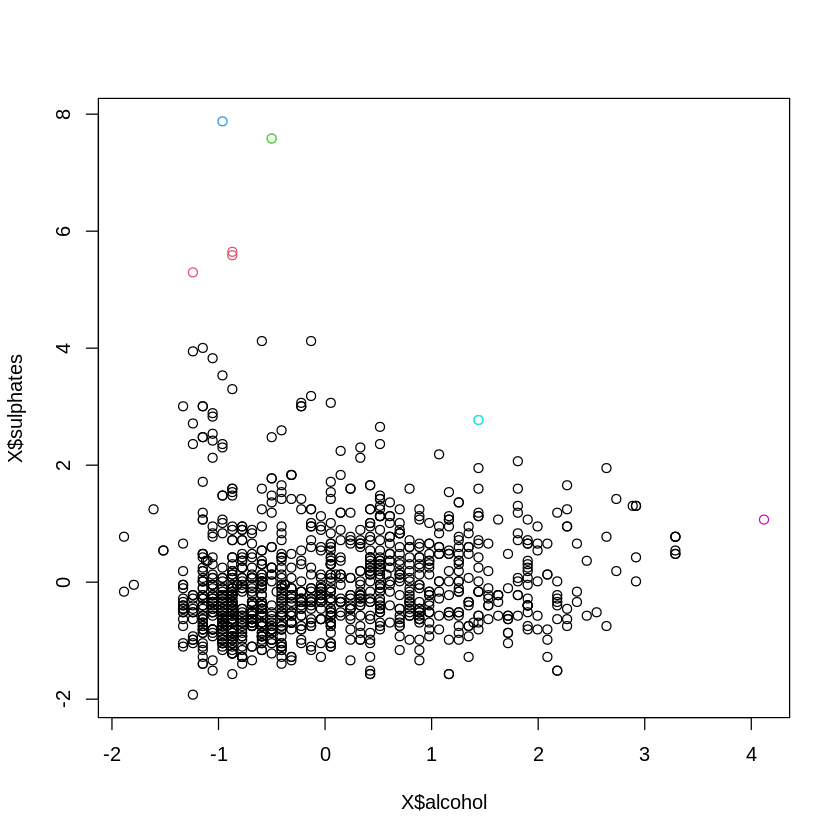

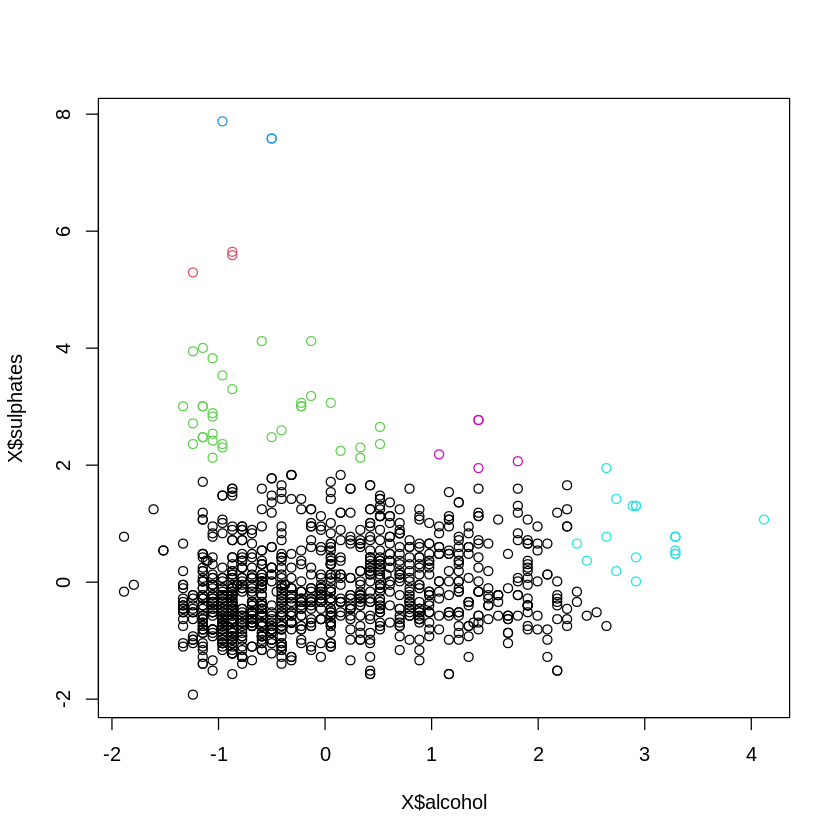

In [83]:
plot(X$alcohol, X$sulphates, col = cutree(hc.simple,6))
plot(X$alcohol, X$sulphates, col = cutree(hc.ave,6))

In [84]:
vinos %>%   group_by(cutree(hc.comp,6)) %>%
  summarise(alcohol.media = mean(alcohol),sulfato.media = mean(sulphates), cant = n())  

"cutree(hc.comp, 6)",alcohol.media,sulfato.media,cant
<int>,<dbl>,<dbl>,<int>
1,9.664812,0.6067267,611
2,9.470000,1.3970000,10
3,10.900000,0.9009756,123
4,11.340246,0.6125568,352
5,9.733333,1.9666667,3
6,13.040152,0.7895455,44


In [85]:
vinos %>%   group_by(cutree(hc.ward,6)) %>%
  summarise(alcohol.media = mean(alcohol),sulfato.media = mean(sulphates), cant = n())  

"cutree(hc.ward, 6)",alcohol.media,sulfato.media,cant
<int>,<dbl>,<dbl>,<int>
1,9.718996,0.5197849,279
2,9.515467,0.6678788,264
3,10.243697,0.9924370,119
4,10.410933,0.6154400,125
5,11.730793,0.5550000,164
6,11.809549,0.7519271,192


In [86]:
vinos %>%   group_by(cutree(hc.simple,6)) %>%
  summarise(alcohol.media = mean(alcohol),sulfato.media = mean(sulphates), cant = n())  

"cutree(hc.simple, 6)",alcohol.media,sulfato.media,cant
<int>,<dbl>,<dbl>,<int>
1,10.440153,0.6507672,1134
2,9.366667,1.5966667,3
3,9.900000,1.9500000,2
4,9.400000,2.0000000,1
5,12.000000,1.1300000,2
6,14.900000,0.8400000,1


## Evaluación de los clusters

Una de las dificultades que presenta el aprendizaje no supervisado es que no existe algún método que funcione mejor que otro, además, la modificación de los denominados hiperparámetros afecta sensiblemente el rendimiento del algoritmo empleado. Por lo tanto, se busca comparar varias metodologías que se usan habitualmente para la detección de clústeres, e incluso comparar varias veces la misma metodología, pero variando los hiperparámetros. Para esto hay que evaluarlos usando métricas de rendimineto.

Uno de los indicadores es el ratio que surge entre la suma de cuadrados entre clusters y la suma de cuadrados total.

Una de las más utilizadas en la literatura es el coeficiete de siluetas

\begin{equation}
s=\frac{b-a}{max(a,b)}
\end{equation}

siendo $a$ la distancia media entre una observación y todos los elementos de su grupo y $b$ la distancia media entre una observación y todos los elementos de su grupo más próximo.


In [94]:
install.packages("factoextra")
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



### Elegir el número de grupos

Los indicadores de evaluación tambien nos sirven para definir los parámetros de las metodologías, entre ellas la cantidad de grupos. Hasta ahora manejamos 6 por conocimiento de los datos, pero en la práctica no sabemos la clasificación que tienen. Con k-means una de las formas para saberlo es que con el gráfico de codo (*elbow plot*) con la suma de cuadrados intra grupos.

Creamos una función que calcule el suma de cuadrados intra grupos entre varias posibilidades de grupos

In [88]:
elegir_grupos <- function(datos, metodo, grupos) {
    whithins <- numeric()
    for (i in 1:length(grupos)){
        m <- metodo(datos, grupos[i])
        whithins[i] <- mean(m$withinss)
        }
    return(whithins)}
    

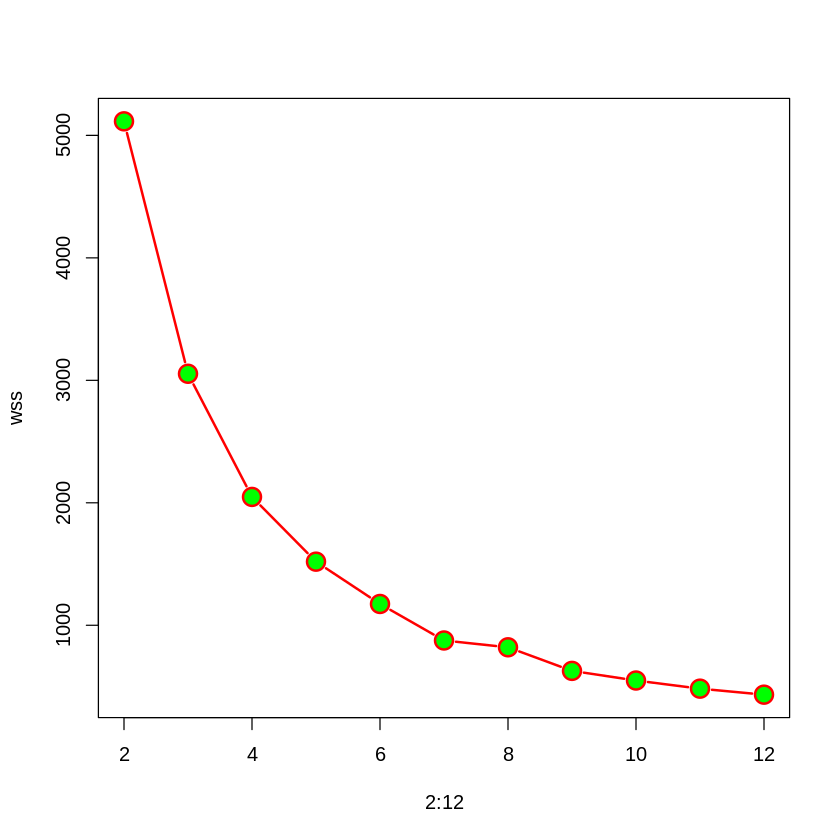

In [91]:
set.seed(15)
wss <- elegir_grupos(X, kmeans, 2:12)

plot(2:12,wss, type = "b", cex = 2,pch = 21,bg = 'green', col = 'red', lwd = 2)

In [92]:
hc.complete <- hclust(dist(X), method = "complete")
hc.average <- hclust(dist(X), method = "average")
hc.single <- hclust(dist(X), method = "single")
hc.ward <- hclust(dist(X), method = "ward.D")

In [96]:
set.seed(456)
coef_sil <- function(datos, metodo, n_clusters, distancia, arbol =TRUE){
    if(arbol){
      agrup <- cutree(metodo, k = n_clusters)}else
    {
      km <- metodo(datos,n_clusters)
      agrup <- km$cluster }
         
    valores_siluetas <- cluster::silhouette(agrup, get_dist(x = datos, method = distancia))
    media_siluetas <- summary(valores_siluetas)[[4]]
    return(media_siluetas)
    }
cant_grupos <- function(datos, metodo, lista_grupos, distancia, arbol = TRUE){
    valores_siluetas <- numeric()
    for(i in 1:length(lista_grupos)) {
        v <- coef_sil(datos, metodo, lista_grupos[i], distancia,arbol)
        valores_siluetas[i] <- v
        }
    return(plot(lista_grupos,valores_siluetas, type = "b", cex = 2,pch = 21,bg = 'green', col = 'red', lwd = 2))
    }

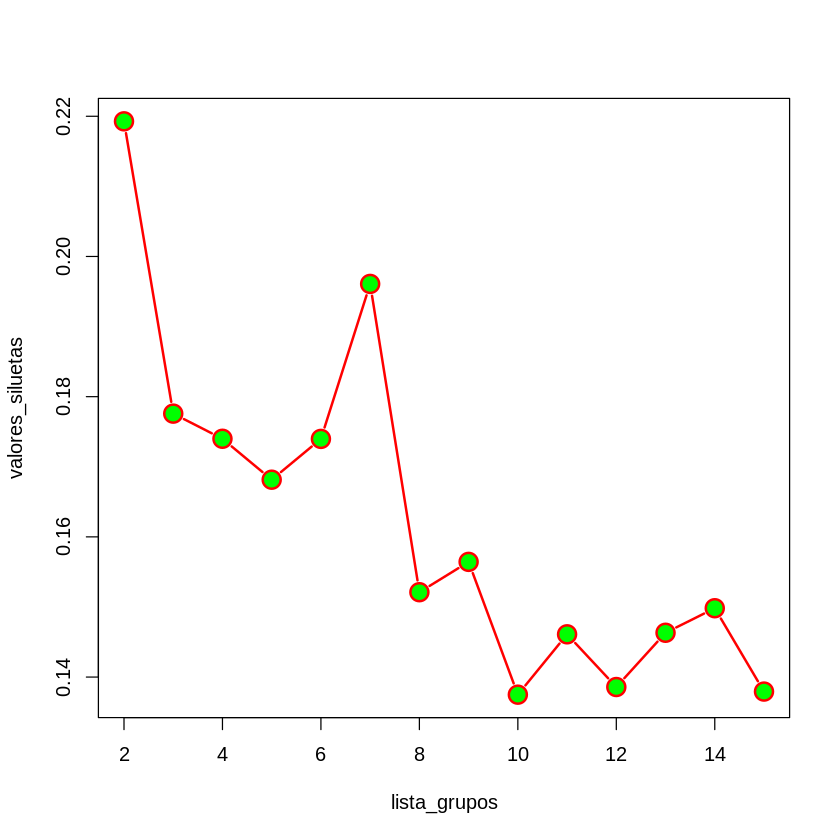

In [97]:
graf5 <- cant_grupos(X,kmeans,2:15,'euclidea', FALSE)

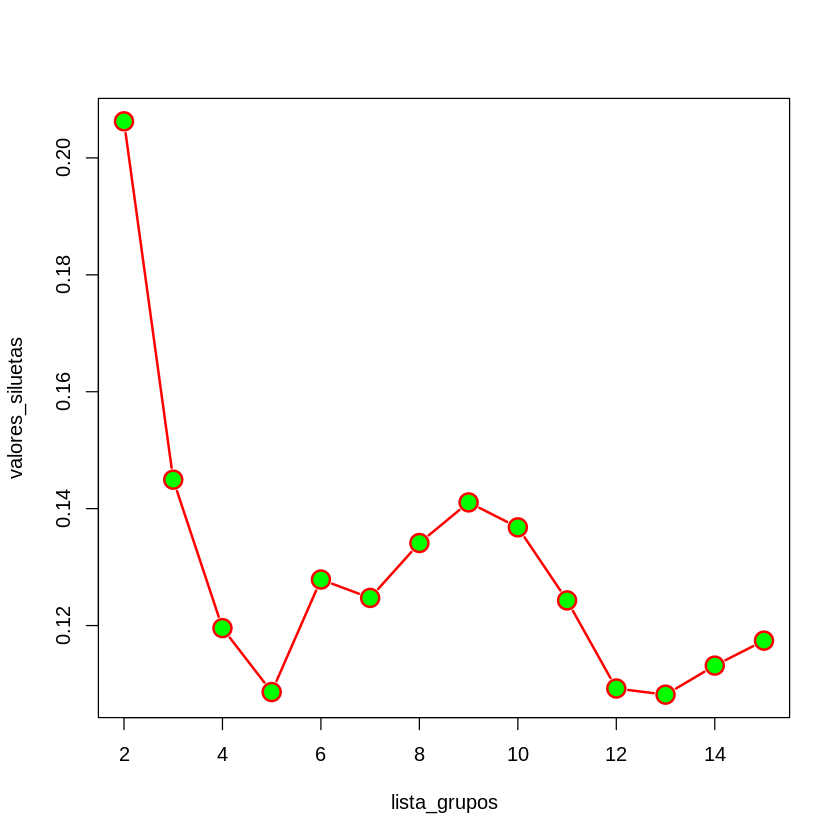

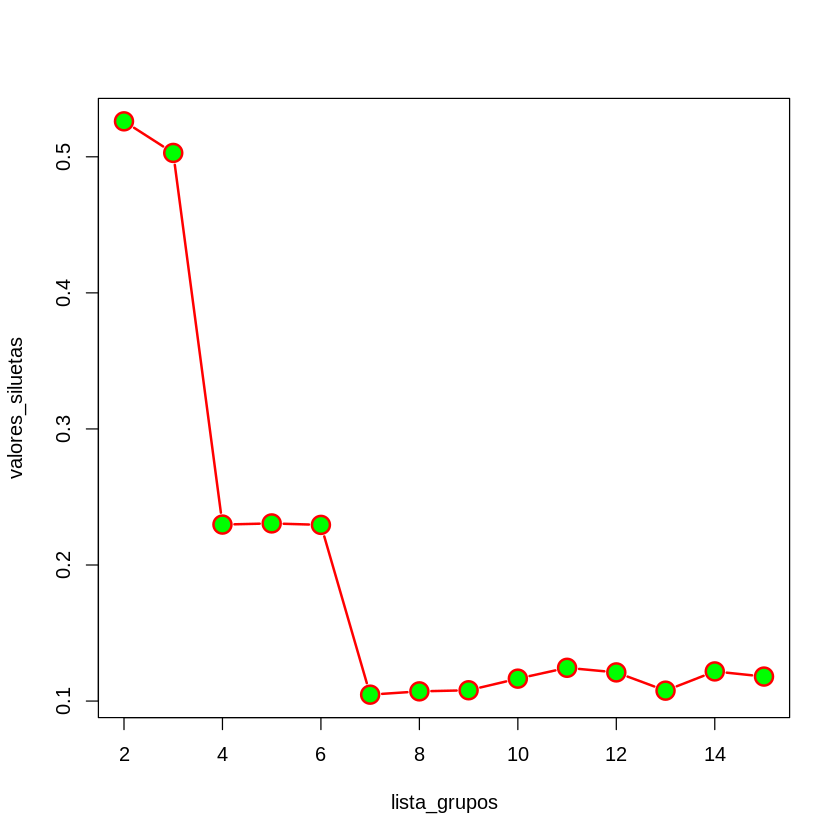

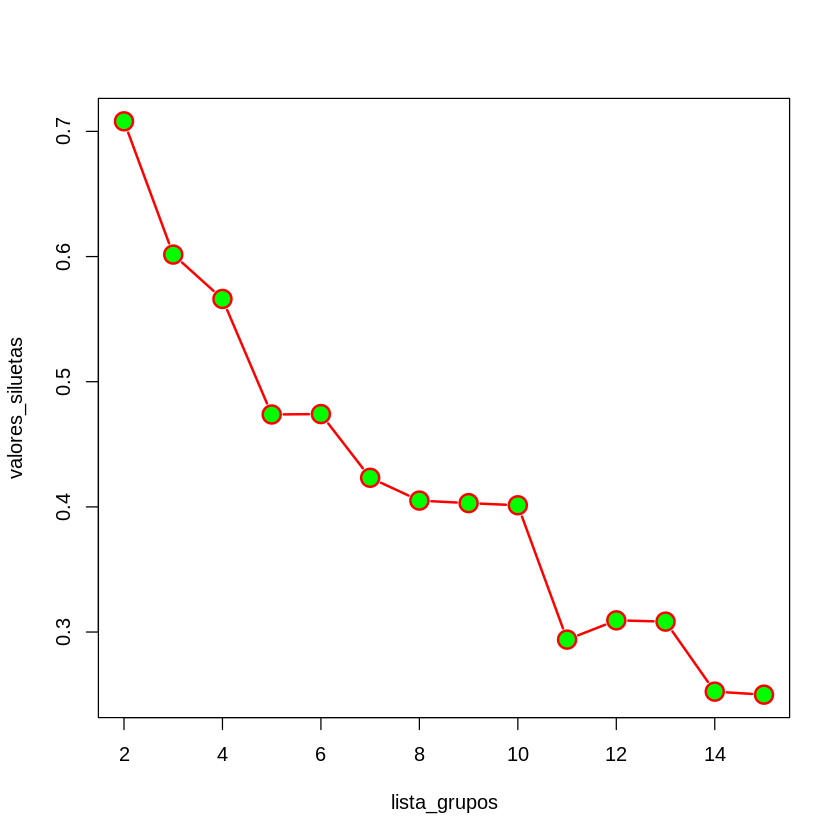

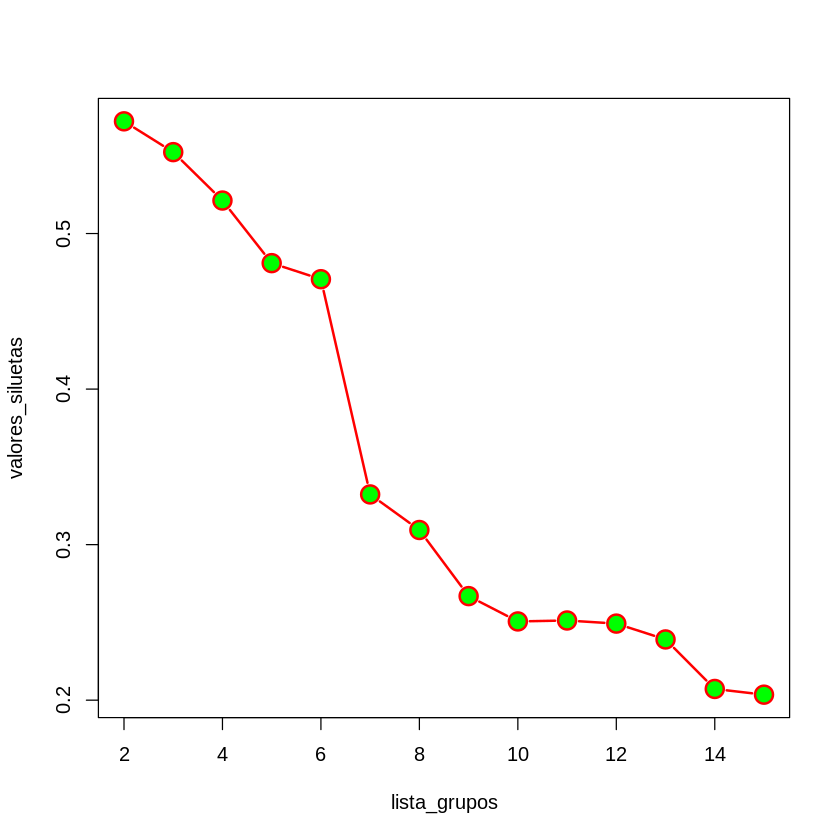

In [98]:
graf1 <- cant_grupos(X,hc.ward, 2:15, "euclidea")
graf2 <- cant_grupos(X,hc.complete, 2:15, "euclidea")
graf3 <- cant_grupos(X,hc.single, 2:15, "euclidea")
graf4 <- cant_grupos(X,hc.average, 2:15, "euclidea")


Con la función fviz_nbclust del paquete factoextra podemos ver los gráficos anteriores, sin programarlos nosotros

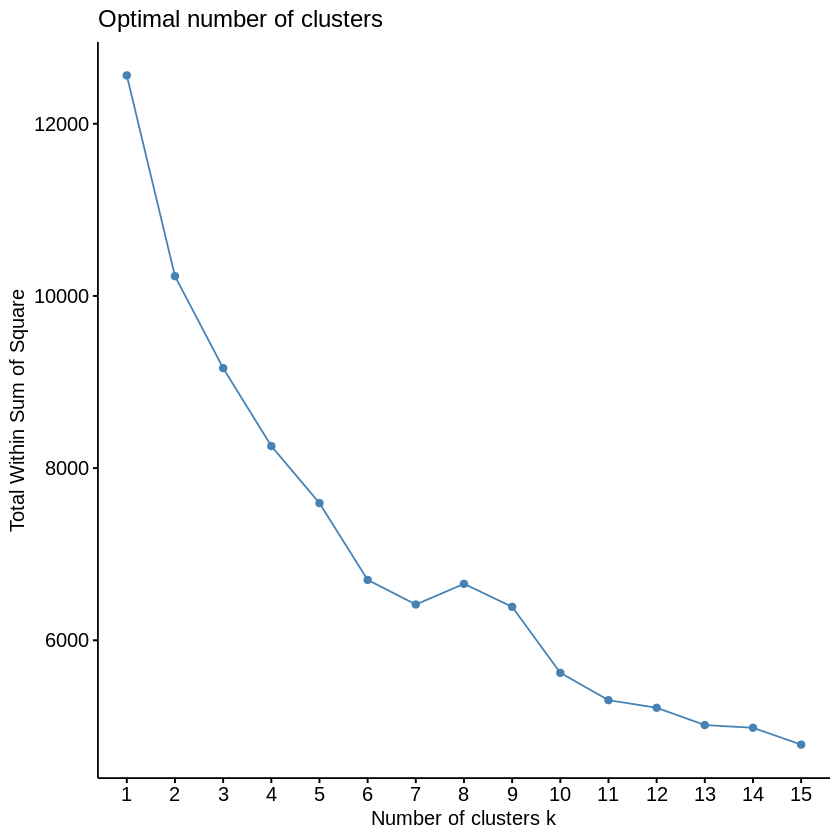

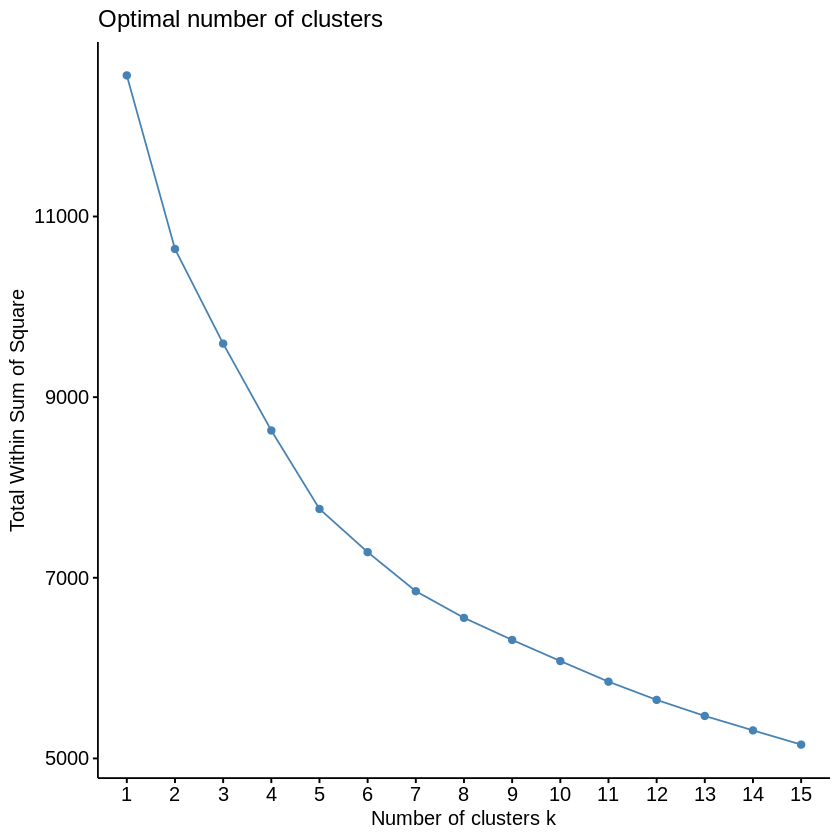

In [108]:
fviz_nbclust(x = X, FUNcluster = kmeans, method = "wss", k.max = 15)


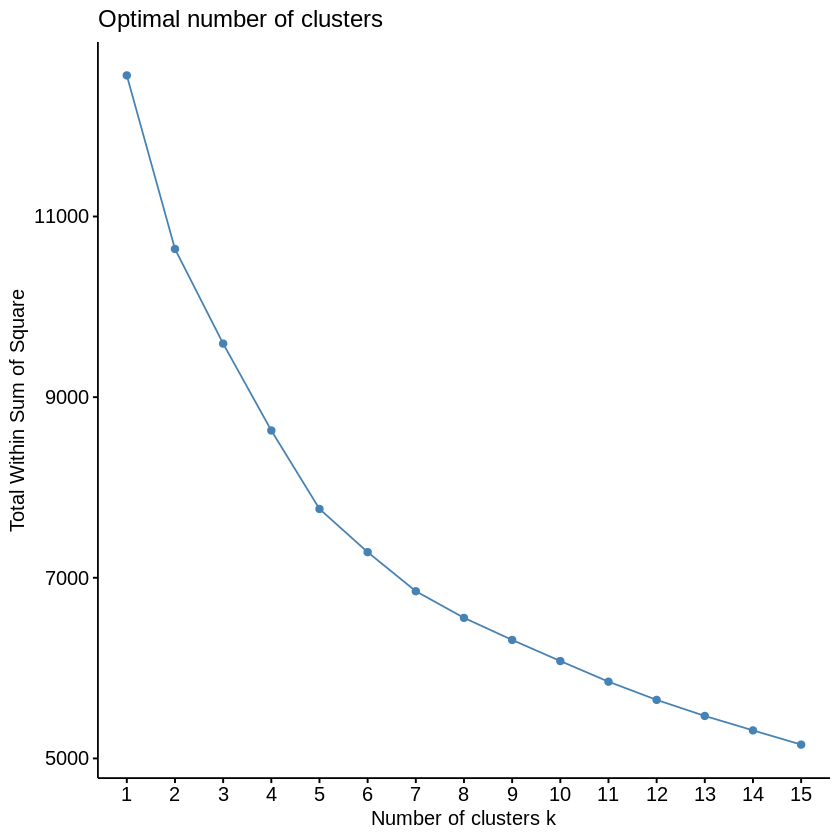

In [111]:
fviz_nbclust(x = X, FUNcluster = hcut, method = "wss", k.max = 15)

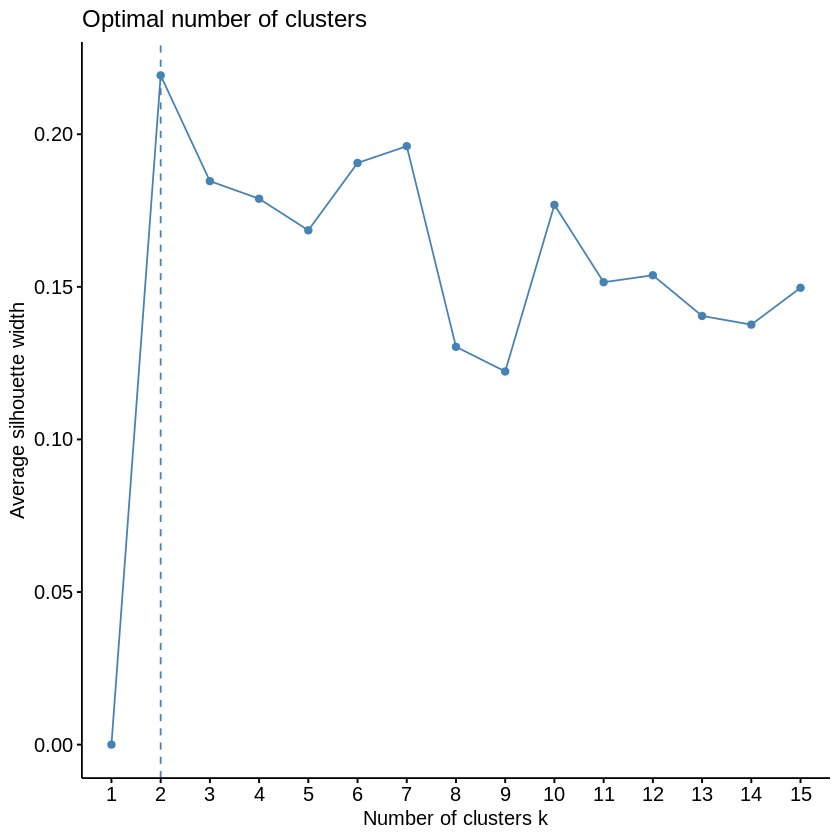

In [109]:
fviz_nbclust(x = X, FUNcluster = kmeans, method = "silhouette", k.max = 15)

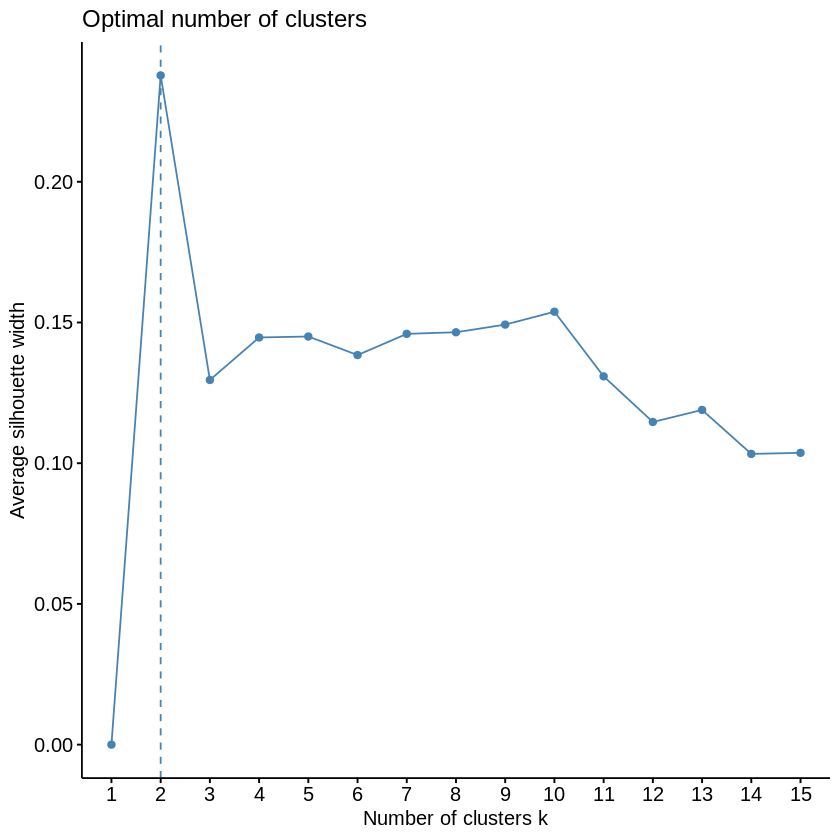

In [110]:
fviz_nbclust(x = X, FUNcluster = hcut, method = "silhouette", k.max = 15)

### Calidad de los clusters

  cluster size ave.sil.width
1       1  367          0.23
2       2   31          0.05
3       3   19          0.38
4       4  181          0.20
5       5  180          0.22
6       6  240          0.15
7       7  125          0.15


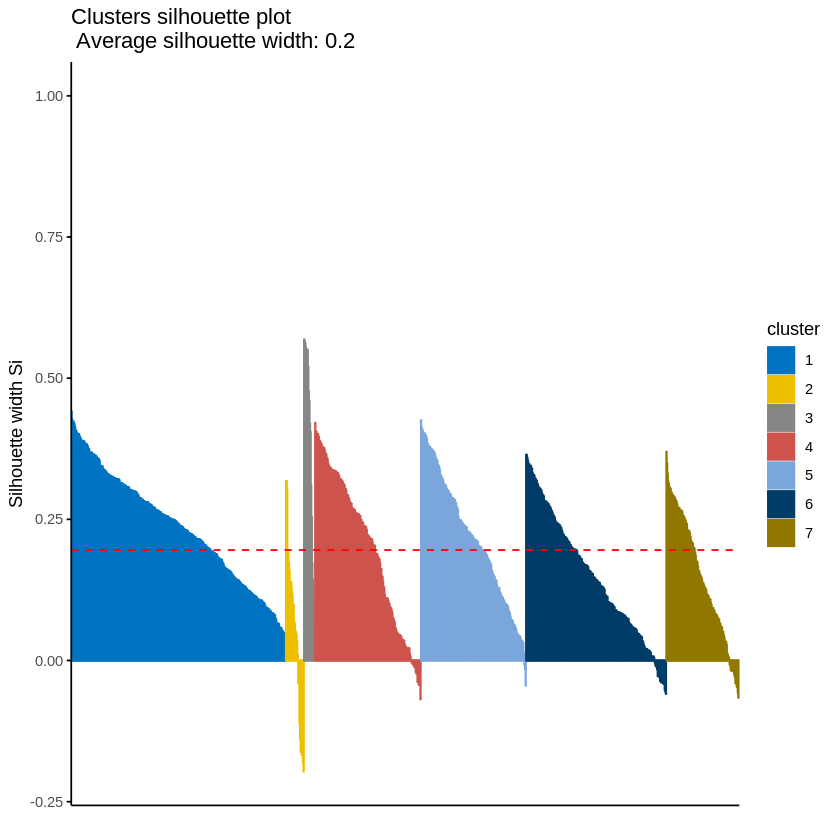

In [99]:
km_clusters <- factoextra::eclust(x = X, FUNcluster = "kmeans", k = 7, seed = 123,
                      hc_metric = "euclidean", nstart = 50, graph = FALSE)
factoextra::fviz_silhouette(sil.obj = km_clusters, print.summary = TRUE, palette = "jco",
                ggtheme = ggplot2::theme_classic())

  cluster size ave.sil.width
1       1  343          0.18
2       2  320          0.06
3       3  218          0.10
4       4  122          0.26
5       5   17          0.50
6       6  123          0.12


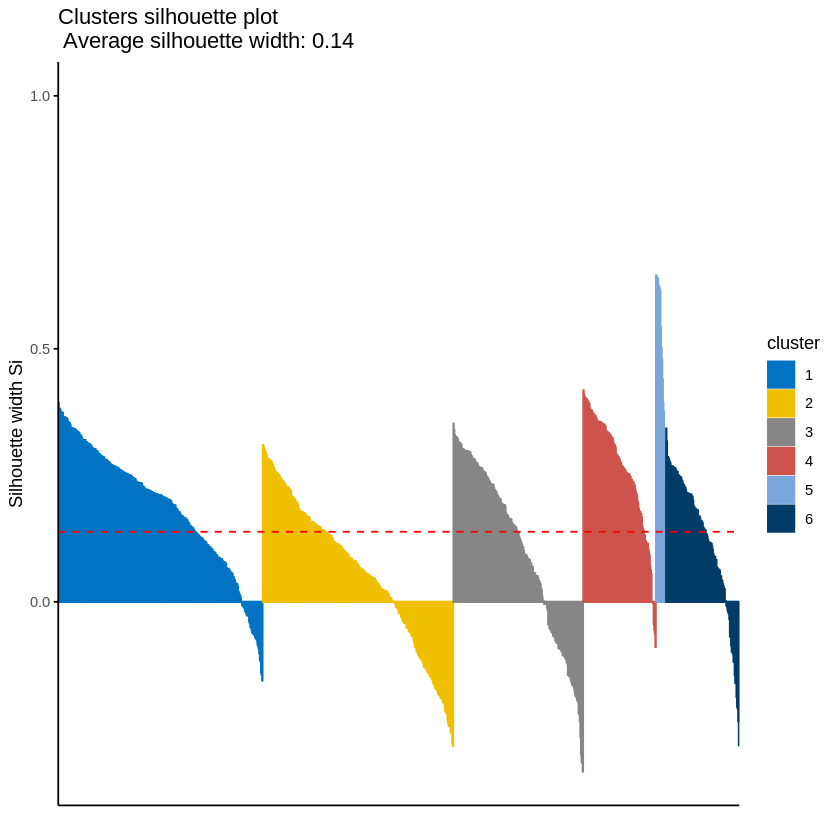

In [105]:
km_clusters <- factoextra::eclust(x = X, FUNcluster = "hclust", k = 6, seed = 123,
                      hc_metric = "euclidean", nstart = 50, graph = FALSE)
factoextra::fviz_silhouette(sil.obj = km_clusters, print.summary = TRUE, palette = "jco",
                ggtheme = ggplot2::theme_classic())

In [216]:
n_clust = 6
clusters <- kmeans(X,n_clust)$cluster
vinos2 <- vinos
vinos2$clusters <- clusters
df <- matrix(unique(1:n_clust , nrow = 7))
for (i in variables){
   var <- tapply(vinos2[[i]],vinos2[["clusters"]],mean)
  df <- cbind(df,var)
}
nombres <- c('grupo',variables)
colnames(df) <- nombres



In [217]:
df

,grupo,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,1,6.281890,0.6080315,0.08362205,2.215748,0.06559055,19.57480,43.71654,0.9940076,3.516299,0.6275591,11.851312
2,2,11.402410,0.4333735,0.51981928,3.424096,0.09212048,11.76506,34.32530,0.9993584,3.146145,0.7069277,10.366667
3,3,8.623267,0.3469802,0.42064356,2.320050,0.07687129,11.79208,27.48515,0.9957761,3.283168,0.7425248,11.412376
4,4,8.484211,0.5352632,0.55631579,2.031579,0.37336842,15.89474,64.00000,0.9970884,3.033684,1.2794737,9.436842
5,5,8.097046,0.5399156,0.28194093,2.807384,0.08563291,26.93038,89.96835,0.9971508,3.289831,0.6206329,9.852180
6,6,7.619643,0.6376020,0.12109694,2.224107,0.08373724,11.07908,33.52041,0.9967199,3.354923,0.5952041,9.922917


In [219]:
install.packages("fastDummies")
library(fastDummies)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [220]:
vinos2 %>%
    dummy_cols(select_columns = "quality") %>%
    select(clusters,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8) %>%
    group_by(clusters) %>%
    summarise(sum3=sum(quality_3),sum4=sum(quality_4),sum5=sum(quality_5),sum6=sum(quality_6),sum7=sum(quality_7),sum8=sum(quality_8))

clusters,sum3,sum4,sum5,sum6,sum7,sum8
<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,7,26,75,17,2
2,2,1,53,74,31,5
3,0,2,25,95,71,9
4,0,1,10,7,1,0
5,0,4,160,65,8,0
6,4,18,209,146,15,0
